# Simple Regression Practice

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [2]:
salary_df = pd.read_csv("https://raw.githubusercontent.com/TipGreenTea/ITDS251x2-ML/refs/heads/main/Salary_dataset.csv", index_col=0)
salary_df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [3]:
# Defining the features and target variable
X = salary_df['YearsExperience'].values.reshape(-1, 1)  # Reshape X to be 2D using .values (30,1)
y = salary_df['Salary'].values

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42 --> 20% test: 8

# Creating and fitting the Linear Regression model
# Different Regression Machine Learning Methods
lin_model = LinearRegression()

# Train the model
lin_model.fit(X_train, y_train)

# Predicting values for the validation set
y_pred = lin_model.predict(X_test)

# Displaying the parameters of the linear model
coefficients = lin_model.coef_
intercept = lin_model.intercept_

# Comparing predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

print(f"coefficients: {coefficients}, intercept: {intercept} \n{comparison} \nmae: {mae}, rmse: {rmse}")

coefficients: [9423.81532303], intercept: 24380.201479473704 
     Actual      Predicted
0  112636.0  115791.210113
1   67939.0   71499.278095
2  113813.0  102597.868661
3   83089.0   75268.804224
4   64446.0   55478.792045
5   57190.0   60190.699707 
mae: 6286.453830757745, rmse: 7059.04362190151


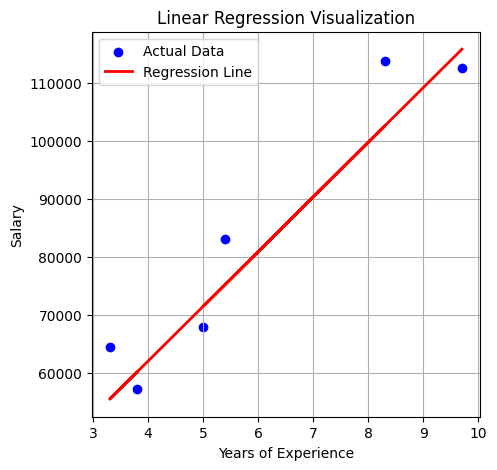

In [4]:
# Plotting the regression line
plt.figure(figsize=(5, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Visualization')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# Multiple Regression Practice





In [ ]:
# Import the '...' into a DataFame called house_sales and view
house_sales = pd.read_csv("https://raw.githubusercontent.com/TipGreenTea/ITDS251x2-ML/main/housing-data.csv")
house_sales

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900
5,1985,4,61,299900
6,1534,3,12,314900
7,1427,3,57,198999
8,1380,3,14,212000
9,1494,3,15,242500


### 1.2. Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.
  Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
  Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.

In [ ]:
house_sales.shape

(47, 4)

### 1.3. Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to floating point values or integers to represent categorical or ordinal values. You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [ ]:
house_sales.dtypes

,0
sqft,int64
bdrms,int64
age,int64
price,int64


### 1.4. Descriptive Statistics
Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute.

In [ ]:
house_sales.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


## 2. Understand Data With Visualization
### 2.1. Univariate Plots
In this section we will look at three techniques that you can use to understand each attribute of your dataset independently.
  Histograms.
  Density Plots.
  Box and Whisker Plots.
#### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

array([[<Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'bdrms'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

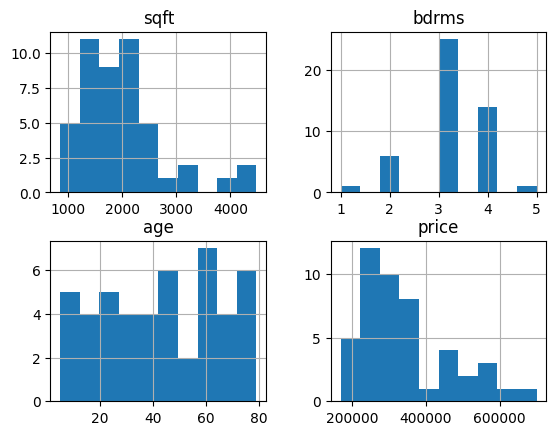

In [ ]:
house_sales.hist()

### 2.2. Multivariate Plots
This section provides examples of two plots that show the interactions between multiple variables in your dataset.
  Correlation Matrix Plot.   Scatter Plot Matrix.
#### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [ ]:
house_sales.corr()

,sqft,bdrms,age,price
sqft,1.000000,0.559967,0.079853,0.854988
bdrms,0.559967,1.000000,0.077486,0.442261
age,0.079853,0.077486,1.000000,0.051791
price,0.854988,0.442261,0.051791,1.000000


#### Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

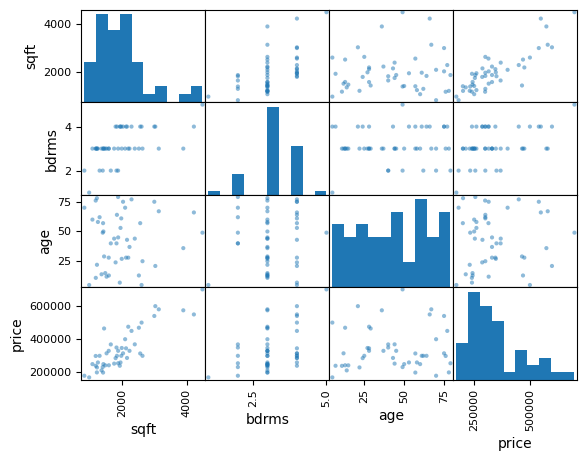

In [ ]:
pd.plotting.scatter_matrix(house_sales)
plt.show()



## 3. Prepare Your Data For Machine Learning (Regression Problem)




In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# Defining the features and target variable
X = house_sales.drop('price', axis=1)
y = house_sales['price']

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42 --> 20% test: 8

# Creating and fitting the Linear Regression model
# Different Regression Machine Learning Methods

lin_model = LinearRegression()
#lin_model = Ridge()
#lin_model = Lasso()
#lin_model = ElasticNet()
#lin_model = DecisionTreeRegressor()
#lin_model = SVR()

# Train the model
lin_model.fit(X_train, y_train)

# Predicting values for the validation set
y_pred = lin_model.predict(X_test)

# Displaying the parameters of the linear model
coefficients = lin_model.coef_
intercept = lin_model.intercept_

# Comparing predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)


coefficients, intercept, comparison, mae, rmse, r2

NameError: name 'house_sales' is not defined